# Homework 4

In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset. 

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion materials are also allowed.

# Exercises
## Exercise 1 - Agglomerative Clustering (40 points in total)

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (20 points)

 - Explain why you would pick these parameters. 
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be? 
 
Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

### 1.1 
1. We should use single-linkage because we are taking into account the relationship between each bit when we transform a bit to form an equivalence class. 
2. We should use a Hamming distance function because it measures the number of bit positions at which two bitstrings differ.
3. We should use a distance threshold of 1 because we want to form equivalence classes by flipping one bit at a time. 

In [1]:
# imports
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df = pd.read_csv('./bitstrings.csv')

### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (20 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints: 
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.

7     296
5     194
0     193
2     187
6     100
1     100
3      99
4       3
8       3
12      2
10      2
23      1
11      1
15      1
9       1
26      1
13      1
16      1
18      1
30      1
29      1
28      1
24      1
27      1
14      1
31      1
17      1
25      1
19      1
20      1
21      1
22      1
Name: class, dtype: int64


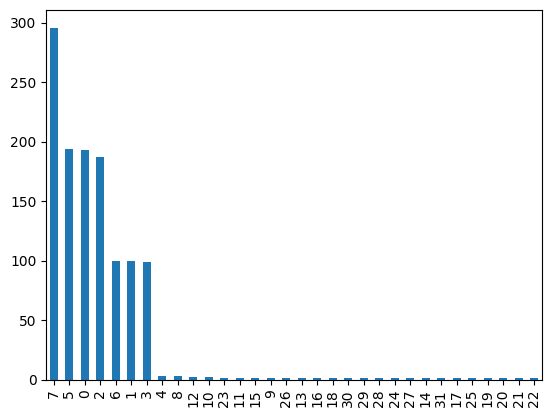

In [2]:
clst = AgglomerativeClustering(n_clusters=None, metric="manhattan", linkage="single", distance_threshold=1.01)
agg_result = clst.fit(np.asarray(df))

clustering = pd.Series(agg_result.labels_, name='class')
distribution = clustering.value_counts()
print(distribution)

_ = distribution.plot(kind='bar')

## Exercise 2 - K-Means Clustering (30 points in total)

Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (20 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

C:\Users\russe\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\russe\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


8     100
4     100
7      80
15     77
13     76
12     75
11     74
20     73
21     72
28     52
16     43
23     40
3      24
24     23
10     23
27     23
31     22
19     20
1      19
6      18
2      18
25     17
26     17
0      16
29     16
22     15
17     14
30     13
14     12
5      12
9      11
18      5
Name: class, dtype: int64


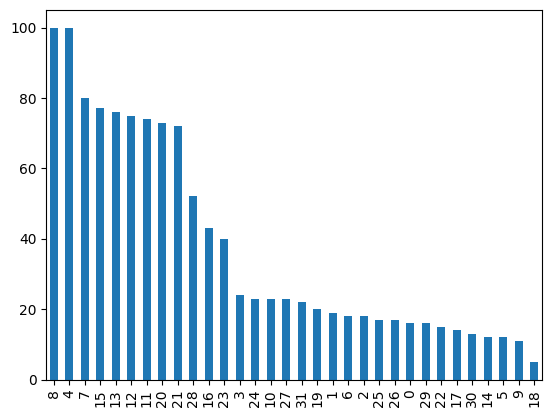

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=agg_result.n_clusters_)
kmeans_result = kmeans.fit(np.asarray(df))

kmeans_clustering = pd.Series(kmeans_result.labels_, name='class')
kmeans_distribution = kmeans_clustering.value_counts()
print(kmeans_distribution)

_ = kmeans_distribution.plot(kind='bar')

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

When we use Agglomerative Clustering, the clusters are much more dense in certain groups. The first cluster has the most elements, and then the next 3 clusters have the second most, and the 3 following clusters have the third most, and then the rest of the clusters all have 1 element. <br>
When we use K-Means Clustering, the clusters are more evenly split up. The number of elements in each cluster goes down gradually compared to Agglomerative Clustering, and the clusters are roughly equally sized. <br>
This difference is due to the methodology of the two clustering methods. Agglomerative clustering is bottom-up and produces clusters of arbitrary shape and size since it compares the similarity between individual data points. On the other hand, K-Means clustering produces spherical and roughly equal sized clusters because of its centroid update method. 

## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

In [4]:
kmeans = KMeans(n_clusters=2)

result = kmeans.fit(np.asarray(df))

print(pd.Series(result.labels_).value_counts())

C:\Users\russe\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\russe\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


1    784
0    416
dtype: int64


### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

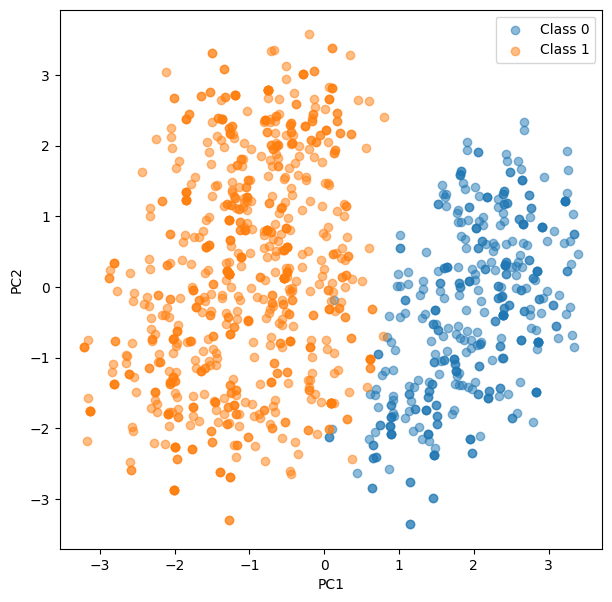

In [5]:
pca = PCA(n_components=2)

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(np.asarray(df))
Z_pca = pca.fit_transform(X)

plt.figure(figsize=(7,7))
plt.scatter(Z_pca[(result.labels_ == 0), 0], Z_pca[(result.labels_ == 0), 1], alpha=0.5, c='tab:blue', label='Class 0')
plt.scatter(Z_pca[(result.labels_ == 1), 0], Z_pca[(result.labels_ == 1), 1], alpha=0.5, c='tab:orange', label='Class 1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [6]:
first_pc = pca.components_[0, :]
first_weights = pd.DataFrame(first_pc.reshape(1, -1), columns=df.columns)
first_weights

,b15,b14,b13,b12,b11,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1,b0
0,0.308907,-0.29254,-0.135617,0.010913,-0.005883,-0.237281,-0.405264,-0.404272,0.351564,0.271495,-0.120186,-0.036135,-0.231819,-0.019761,-0.0145,0.386104


In [7]:
print(f'{first_weights.idxmax(axis=1)[0]} has the highest positive weight.')

b0 has the highest positive weight.
